# Histograms

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([  1.,   2.,   7.,  13.,  16.,  18.,  22.,  15.,   3.,   3.]),
 array([-3.35491198, -2.74879401, -2.14267604, -1.53655807, -0.9304401 ,
        -0.32432213,  0.28179584,  0.88791381,  1.49403178,  2.10014975,
         2.70626773]),
 <a list of 10 Patch objects>)

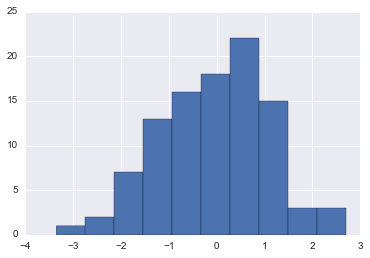

In [2]:
dataset1 = randn(100)

# 10 bins is default
plt.hist(dataset1)

(array([  1.,   4.,   9.,  17.,  16.,   9.,  11.,  11.,   1.,   1.]),
 array([-2.70162849, -2.14438733, -1.58714618, -1.02990502, -0.47266387,
         0.08457729,  0.64181845,  1.1990596 ,  1.75630076,  2.31354191,
         2.87078307]),
 <a list of 10 Patch objects>)

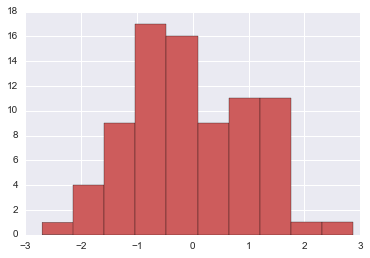

In [3]:
dataset2 = randn(80)

plt.hist(dataset2,color='indianred')

(array([ 0.04486388,  0.        ,  0.08972776,  0.08972776,  0.        ,
         0.40377491,  0.53836655,  0.2243194 ,  0.26918328,  0.44863879,
         0.26918328,  0.13459164,  0.26918328,  0.2243194 ,  0.40377491,
         0.08972776,  0.04486388,  0.        ,  0.        ,  0.04486388]),
 array([-2.70162849, -2.42300791, -2.14438733, -1.86576675, -1.58714618,
        -1.3085256 , -1.02990502, -0.75128444, -0.47266387, -0.19404329,
         0.08457729,  0.36319787,  0.64181845,  0.92043902,  1.1990596 ,
         1.47768018,  1.75630076,  2.03492133,  2.31354191,  2.59216249,
         2.87078307]),
 <a list of 20 Patch objects>)

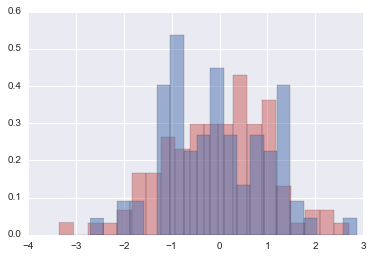

In [4]:
# put both histograms on same plot
# normalize plots
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

/Users/alenamclucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


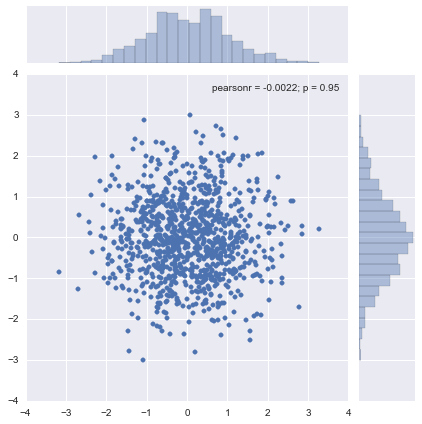

In [5]:
data1 = randn(1000)
data2 = randn(1000)

# joint plots
sns.jointplot(data1,data2)

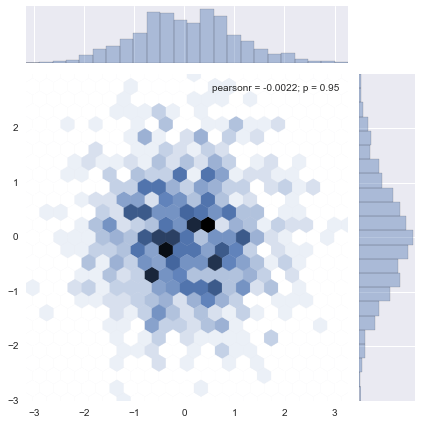

In [6]:
# hox plot gives a little more visualization
sns.jointplot(data1,data2,kind='hex')

# Kernal Density Estimate Plots

(0, 1)

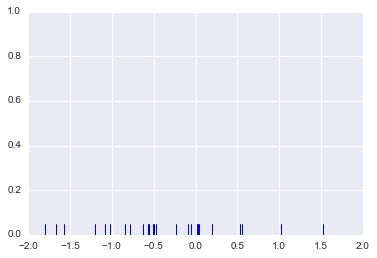

In [7]:
# Gaussian data plot/curves sumed to create KDE plots

dataset3 = randn(25)

# rugplot ticks where the values are, set y axis from 0 - 1
sns.rugplot(dataset3)
plt.ylim(0,1)

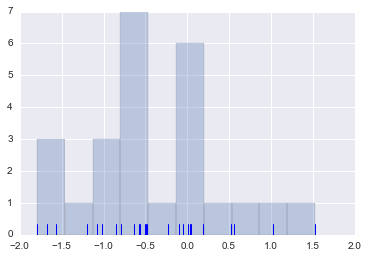

In [8]:
plt.hist(dataset3,alpha=0.3)
sns.rugplot(dataset3)

(0, 1)

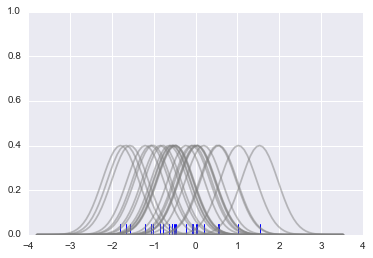

In [9]:
sns.rugplot(dataset3)

x_min = dataset3.min()-2
x_max = dataset3.max()+2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# known stats equation
bandwidth = ((4*dataset3.std()**5)/(3*len(dataset3)))**0.2

kernel_list = []
for data_point in dataset3:
    # create a kernel for each point and append to kernel_list
    # pdf - probability density function
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis,kernel,color='grey', alpha=0.5)
    
plt.ylim(0,1)

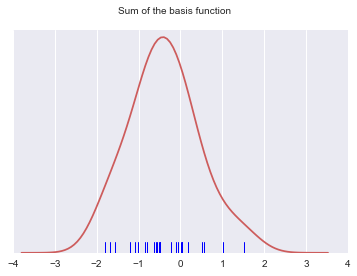

In [10]:
sum_of_kde = np.sum(kernel_list,axis=0)

# kde plot
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset3)
# gets rid of tick marks
plt.yticks([])
plt.suptitle("Sum of the basis function")

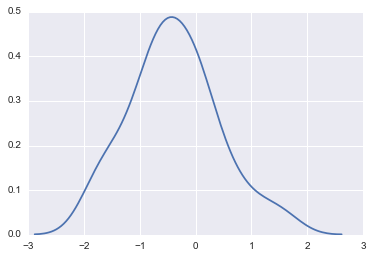

In [11]:
# do all this in one simple step with seaborn
# automatically gets bandwidth estimation for you
sns.kdeplot(dataset3)

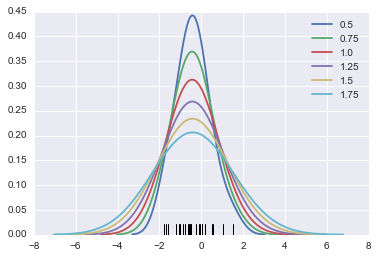

In [12]:
sns.rugplot(dataset3,color='black')

# different bandwidth sizes
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset3,bw=bw,lw=1.8,label=bw)

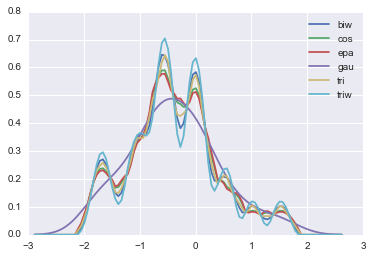

In [13]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset3,kernel=kern,label=kern)

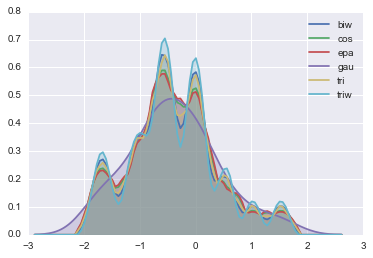

In [14]:
for kern in kernel_options:
    sns.kdeplot(dataset3,kernel=kern,label=kern,shade=True)

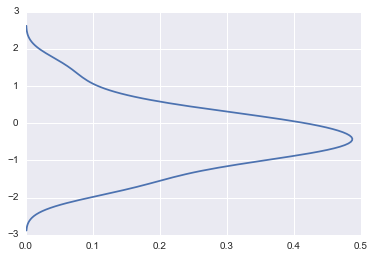

In [15]:
# plot on y axis
sns.kdeplot(dataset3,vertical=True)

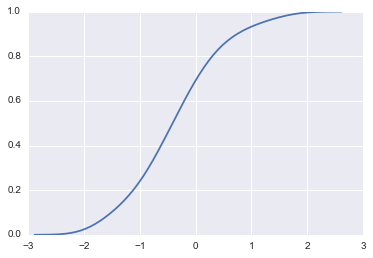

In [16]:
# cdf
sns.kdeplot(dataset3,cumulative=True)

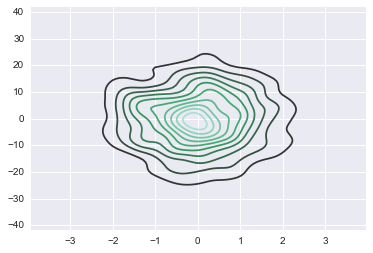

In [17]:
# kde plot for multivarate data
mean = [0,0]
cov = [[1,0],[0,100]]
dataset4 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset4,columns=['X','Y'])
sns.kdeplot(dframe)

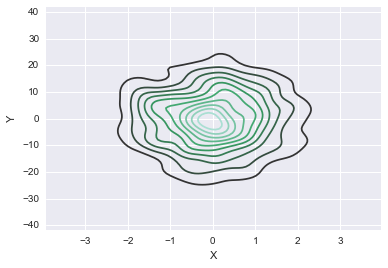

In [18]:
# pass two vectors separately
sns.kdeplot(dframe.X,dframe.Y)

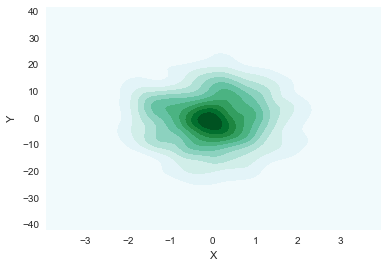

In [19]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

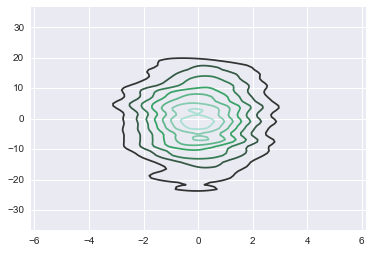

In [20]:
# change bandwidth
sns.kdeplot(dframe,bw=1)

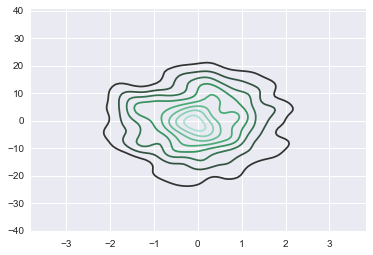

In [21]:
# special bandwidth
sns.kdeplot(dframe,bw='silverman')

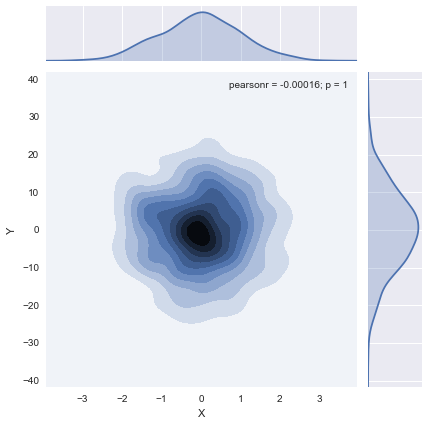

In [22]:
# kde is the kind of joint plot wanted
sns.jointplot('X','Y',dframe,kind='kde')

# Combining Plot Styles

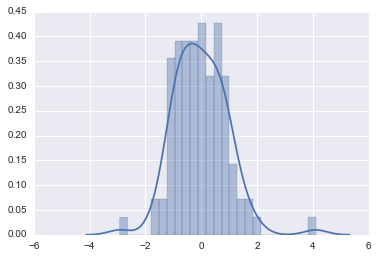

In [23]:
dataset5 = randn(100)

# combines kde plot with histogram
sns.distplot(dataset5,bins=25)

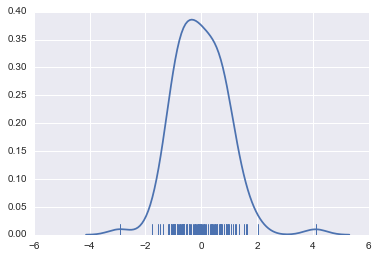

In [24]:
# show rug plot but not histogram
sns.distplot(dataset5,bins=25,rug=True,hist=False)

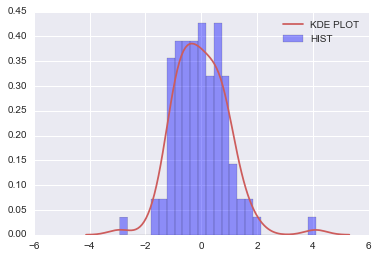

In [25]:
# [plot]_kws edits that plot with dict values
sns.distplot(dataset5,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST'})

In [26]:
from pandas import Series

ser = Series(dataset5,name='My_data')
ser

0     0.679164
1    -0.083413
2    -0.227624
3     0.400366
4    -0.976538
5    -0.858884
6    -2.921964
7     0.365633
8     0.517486
9    -0.286255
10   -1.749886
11    0.682496
12   -0.767163
13    0.674522
14   -0.389707
15   -0.442647
16   -0.993957
17    0.719069
18    0.954532
19    0.094063
20   -1.092480
21    0.902756
22    1.197647
23    0.023475
24   -0.192949
25   -1.163373
26    0.745453
27    0.562817
28   -0.163170
29   -0.493560
        ...   
70   -1.358564
71    1.523751
72    0.245067
73   -0.233171
74    0.884724
75    0.877467
76   -0.708136
77   -0.444325
78    0.911852
79   -0.657260
80    1.614474
81    0.333501
82   -0.020166
83    0.083593
84    2.052047
85   -1.032295
86   -0.051160
87    0.552823
88   -0.922952
89    4.101120
90   -0.644907
91    0.405418
92    0.710959
93   -0.228141
94    1.258309
95   -0.086377
96   -0.985433
97    0.987974
98   -0.601732
99   -1.479433
Name: My_data, dtype: float64

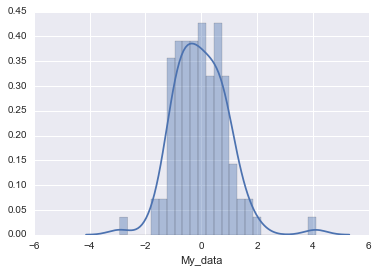

In [28]:
# plot Series
sns.distplot(ser,bins=25)

# Box and Violin Plots

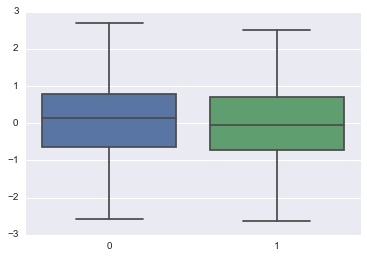

In [33]:
dataset6 = randn(100)
dataset7 = randn(100)

# pass two datasets with list to creat boxplot
# supposed to be showing two but isn't...
sns.boxplot(data=[dataset6,dataset7])

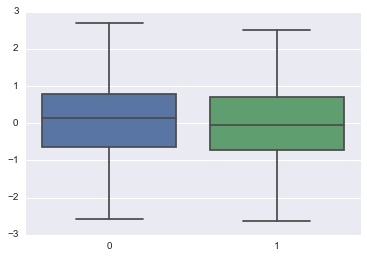

In [34]:
# whiskers jump out to farthest outlier
sns.boxplot(data=[dataset6,dataset7],whis=np.inf)

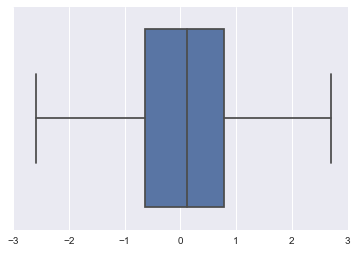

In [35]:
# can make the boxplot horizontal
sns.boxplot(dataset6,vert=False)

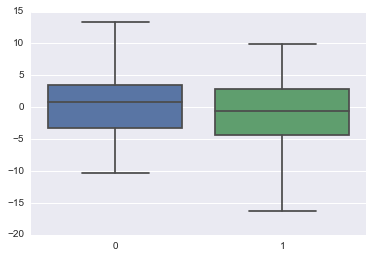

In [38]:
# normal distribution
dataset8 = stats.norm(0,5).rvs(100)

# two gamma distributions concatenated together
dataset9 = np.concatenate([stats.gamma(5).rvs(50)-1,
                          -1*stats.gamma(5).rvs(50)])

# box plot both
sns.boxplot(data=[dataset8,dataset9],whis=np.inf)

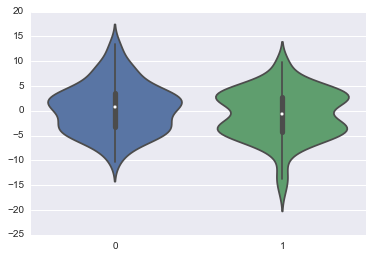

In [40]:
# blue is normal distribution, right is gamma; couldn't see that with box plots
sns.violinplot(data=[dataset8,dataset9])

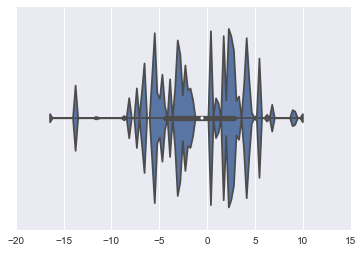

In [41]:
# setting a specific bandwidth can really change your results
sns.violinplot(dataset9,bw=0.01)

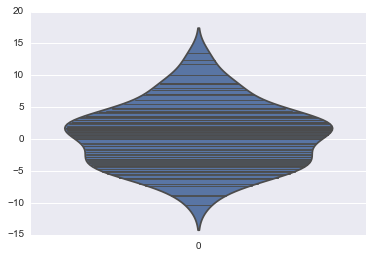

In [45]:
# include a rug plot inside violin plot
sns.violinplot(data=dataset8,inner='stick')

# Regression Plots

In [46]:
# get dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


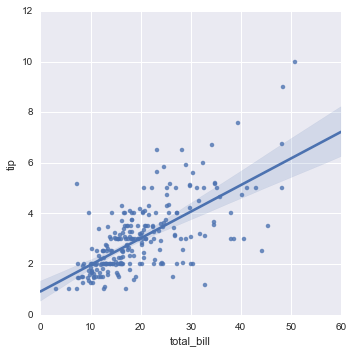

In [47]:
# regression plot of total against bill
sns.lmplot('total_bill','tip',tips)

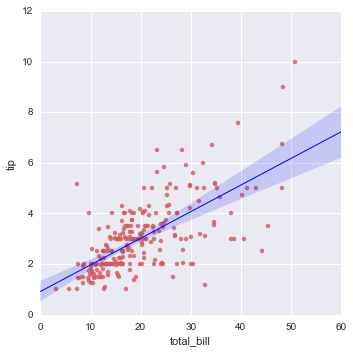

In [48]:
# styling
sns.lmplot('total_bill','tip',tips,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

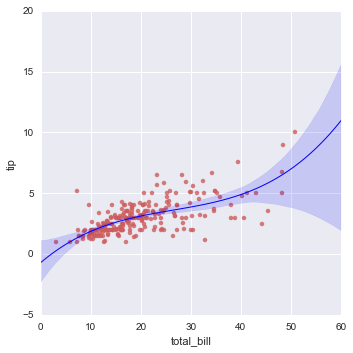

In [50]:
# quadratic / higher order regression
sns.lmplot('total_bill','tip',tips,order=3,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

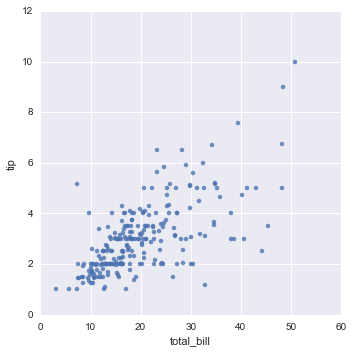

In [51]:
# hide regression
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [52]:
# percentage of the tip
# make new column for percentage of bill the tip is
tips['tip_perc']=100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


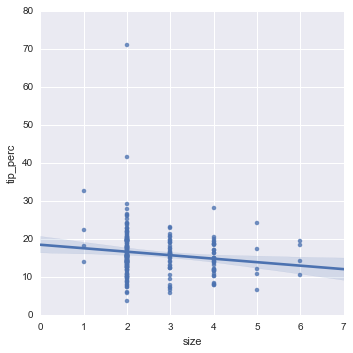

In [53]:
# plot discrete variables?
sns.lmplot('size','tip_perc',tips)

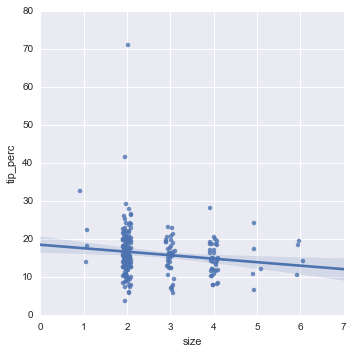

In [55]:
# add jitter so you can see density more
sns.lmplot('size','tip_perc',tips,x_jitter=0.1)

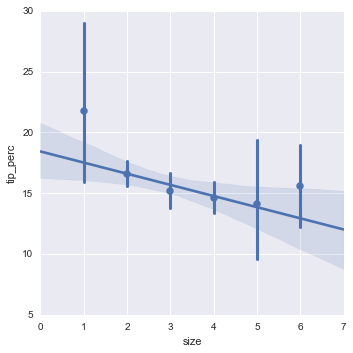

In [56]:
# shows estimate for tendency of each bin
sns.lmplot('size','tip_perc',tips,x_estimator=np.mean)

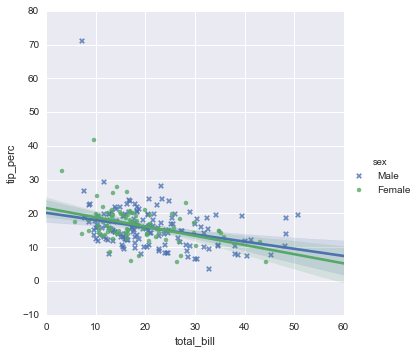

In [57]:
# automatically creates hues and different regression lines for sex column, sets markers
sns.lmplot('total_bill','tip_perc',tips,hue='sex',markers=['x','o'])

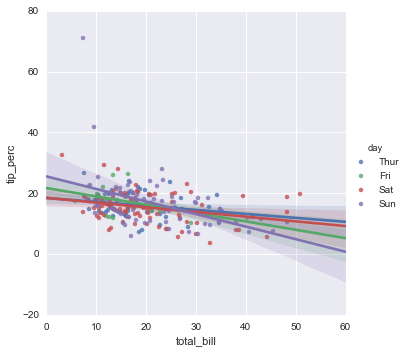

In [58]:
sns.lmplot('total_bill','tip_perc',tips,hue='day')

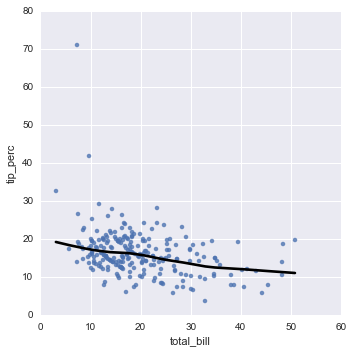

In [59]:
# local/lowess regression
sns.lmplot('total_bill','tip_perc',tips,lowess=True,line_kws={'color':'black'})

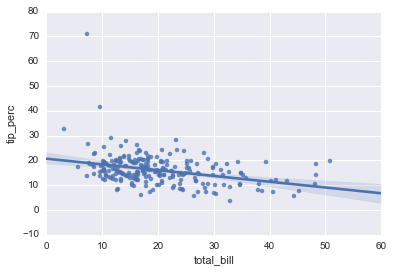

In [61]:
# what lmplot was built on top of, more robust
sns.regplot('total_bill','tip_perc',tips)

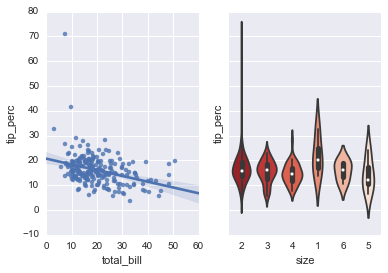

In [70]:
# one row, two columns
fig, (axis1,axis2) = plt.subplots(1,2,sharey=True)

sns.regplot('total_bill','tip_perc',tips,ax=axis1)

sns.violinplot(tips['size'],tips['tip_perc'],palette='Reds_r',ax=axis2)

# Heatmaps and Clustered Matrices

In [71]:
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [72]:
# pivot the dataframe so it's easier to manage
# dataframe.pivot('new_rows','new_columns','data_values')
flight_dframe = flight_dframe.pivot('month','year','passengers')
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


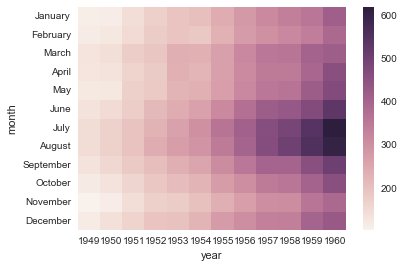

In [73]:
# looks good for a heatmap
sns.heatmap(flight_dframe)

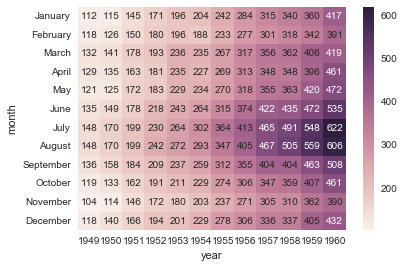

In [74]:
# annotate each cell with number
sns.heatmap(flight_dframe,annot=True,fmt='d')

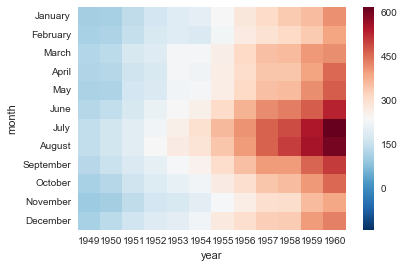

In [75]:
# set a diverging color scheme where white is Jan 1955 with values below blue and above red
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

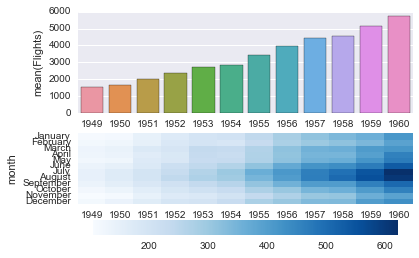

In [77]:
f,(axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# pull index values
years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

# pull values
flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)

sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})

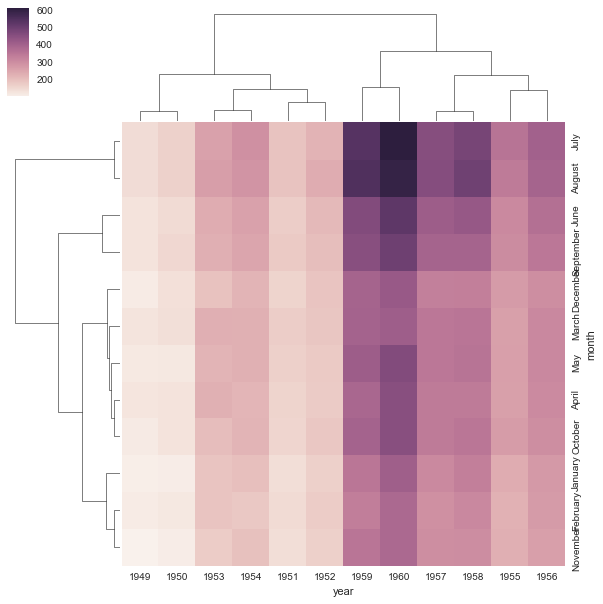

In [78]:
# cluster map clusters similar rows and columns
sns.clustermap(flight_dframe)

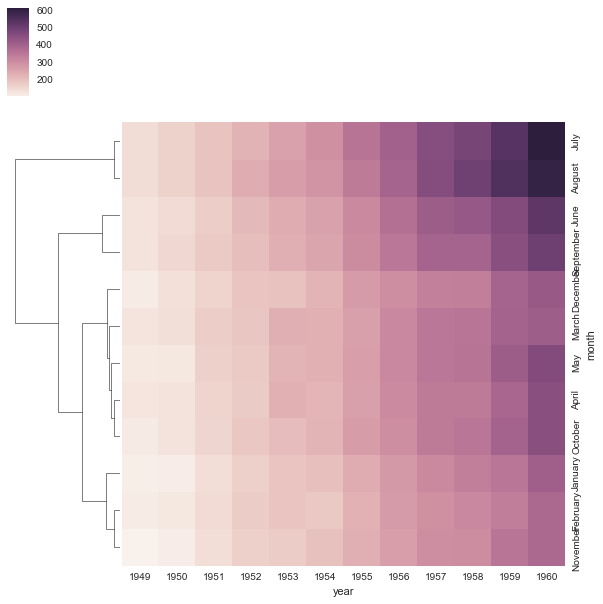

In [79]:
# uncluser columns (only rows)
sns.clustermap(flight_dframe,col_cluster=False)

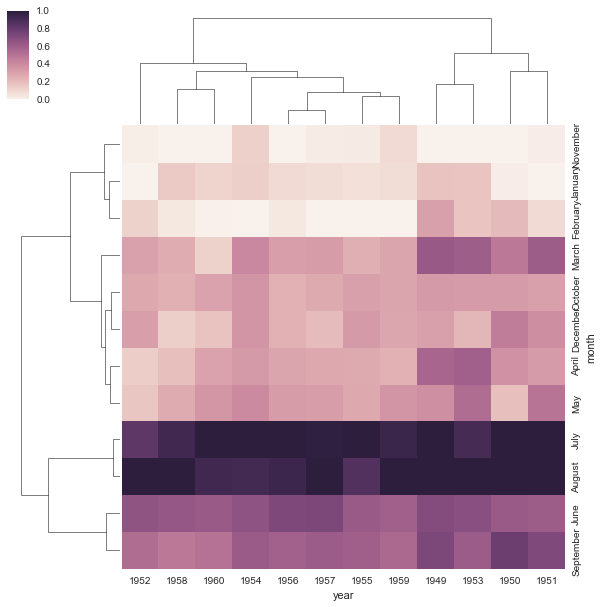

In [80]:
# standardize/scale by columns/years
sns.clustermap(flight_dframe,standard_scale=1)

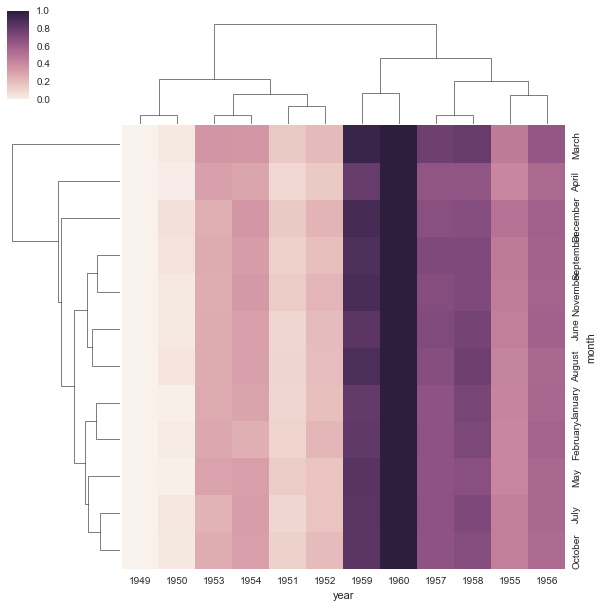

In [81]:
# scales rows
sns.clustermap(flight_dframe,standard_scale=0)

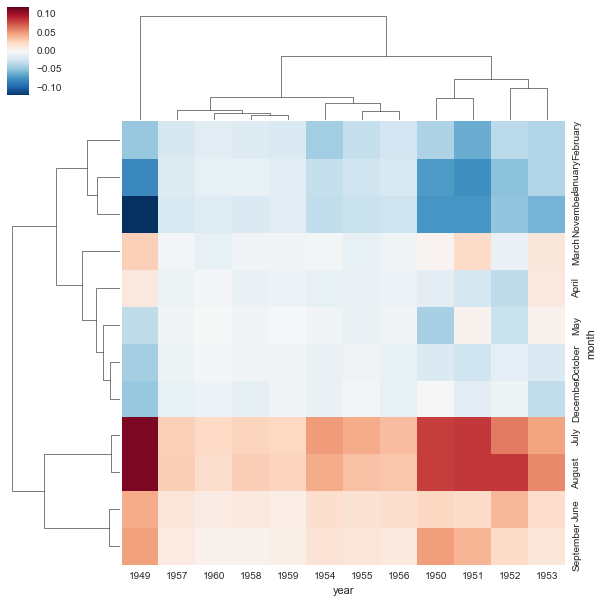

In [82]:
# normalize by z score
sns.clustermap(flight_dframe,z_score=1)